In [47]:
print("Imports")

import polars as pl
from datetime import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Imports


In [48]:
df = pl.read_csv("../../data/processed/cleaned_house_data.csv")
df.head()

price,sqft,bedrooms,bathrooms,location,year_built,condition
i64,i64,i64,f64,str,i64,str
495000,1527,2,1.5,"""Suburb""",1956,"""Good"""
752000,2526,3,2.5,"""Downtown""",1998,"""Excellent"""
319000,1622,2,1.5,"""Rural""",1975,"""Fair"""
1210000,3102,4,3.0,"""Waterfront""",2005,"""Excellent"""
462000,1835,2,2.0,"""Urban""",1982,"""Good"""


In [49]:
df.shape

(84, 7)

In [50]:
df.describe()

statistic,price,sqft,bedrooms,bathrooms,location,year_built,condition
str,f64,f64,f64,f64,str,f64,str
"""count""",84.0,84.0,84.0,84.0,"""84""",84.0,"""84"""
"""null_count""",0.0,0.0,0.0,0.0,"""0""",0.0,"""0"""
"""mean""",628559.52381,2191.5,2.857143,2.190476,null,1982.047619,null
"""std""",359167.825027,650.017117,0.852252,0.828356,null,19.501563,null
"""min""",249000.0,1350.0,2.0,1.0,"""Downtown""",1947.0,"""Excellent"""
"""25%""",375000.0,1700.0,2.0,1.5,null,1965.0,null
"""50%""",512000.0,2010.0,3.0,2.0,null,1983.0,null
"""75%""",729000.0,2580.0,3.0,2.5,null,1995.0,null
"""max""",1.68e6,3850.0,5.0,4.5,"""Waterfront""",2019.0,"""Poor"""


In [51]:
print("Creating new features")

Creating new features


In [52]:
from datetime import datetime
import polars as pl

current_year = datetime.now().year

# Feature 1: house age
df = df.with_columns(
    (pl.lit(current_year) - pl.col("year_built")).alias("house_age")
)

# Feature 2: price per sqft
df = df.with_columns(
    (pl.col("price") / pl.col("sqft")).alias("price_per_sqft")
)

# Feature 3: bedroom / bathroom ratio
df = df.with_columns(
    (pl.col("bedrooms") / pl.col("bathrooms")).alias("bed_bath_ratio")
)

# Clean infinities & nulls
df = df.with_columns(
    pl.when(pl.col("bed_bath_ratio").is_infinite() | pl.col("bed_bath_ratio").is_nan())
      .then(0)
      .otherwise(pl.col("bed_bath_ratio"))
      .alias("bed_bath_ratio")
)

In [53]:
print("Quick Look at the newly engineered Data")
df.select(["house_age", "price_per_sqft", "bed_bath_ratio"]).describe()

Quick Look at the newly engineered Data


statistic,house_age,price_per_sqft,bed_bath_ratio
str,f64,f64,f64
"""count""",84.0,84.0,84.0
"""null_count""",0.0,0.0,0.0
"""mean""",43.952381,268.090387,1.362519
"""std""",19.501563,67.74297,0.26223
"""min""",7.0,179.761905,1.0
"""25%""",31.0,230.195178,1.2
"""50%""",44.0,254.807692,1.333333
"""75%""",61.0,279.104478,1.5
"""max""",79.0,436.363636,2.0


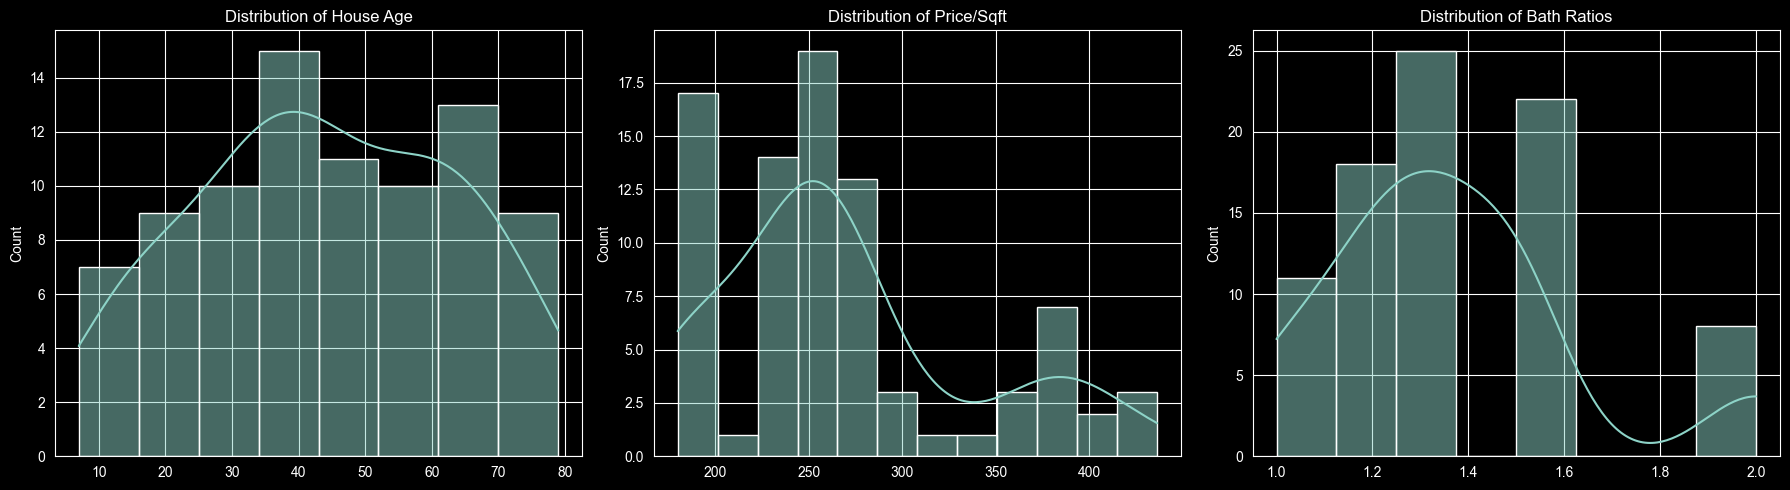

In [54]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df["house_age"], kde = True, ax = axs[0])
axs[0].set_title("Distribution of House Age")

sns.histplot(df["price_per_sqft"], kde = True, ax = axs[1])
axs[1].set_title("Distribution of Price/Sqft")

sns.histplot(df["bed_bath_ratio"], kde = True, ax = axs[2])
axs[2].set_title("Distribution of Bath Ratios")

plt.tight_layout()
plt.show()

In [55]:
selected_columns = [
    'price', 'sqft', 'bedrooms', 'bathrooms', 'location', 'year_built', 'condition',
    'house_age', 'price_per_sqft', 'bed_bath_ratio'
]


In [56]:
selected_cols_df = df.select(selected_columns)

In [57]:
selected_cols_df.head()

price,sqft,bedrooms,bathrooms,location,year_built,condition,house_age,price_per_sqft,bed_bath_ratio
i64,i64,i64,f64,str,i64,str,i64,f64,f64
495000,1527,2,1.5,"""Suburb""",1956,"""Good""",70,324.165029,1.333333
752000,2526,3,2.5,"""Downtown""",1998,"""Excellent""",28,297.70388,1.2
319000,1622,2,1.5,"""Rural""",1975,"""Fair""",51,196.670777,1.333333
1210000,3102,4,3.0,"""Waterfront""",2005,"""Excellent""",21,390.070922,1.333333
462000,1835,2,2.0,"""Urban""",1982,"""Good""",44,251.771117,1.0


In [58]:
selected_cols_df.select(pl.selectors.string())

location,condition
str,str
"""Suburb""","""Good"""
"""Downtown""","""Excellent"""
"""Rural""","""Fair"""
"""Waterfront""","""Excellent"""
"""Urban""","""Good"""
…,…
"""Urban""","""Good"""
"""Suburb""","""Fair"""
"""Downtown""","""Good"""


In [59]:
selected_cols_df['location'].value_counts()

location,count
str,u32
"""Waterfront""",15
"""Mountain""",2
"""Suburb""",17
"""Downtown""",17
"""Urban""",16
"""Rural""",17


In [60]:
selected_cols_df['condition'].value_counts()

condition,count
str,u32
"""Excellent""",22
"""Fair""",19
"""Poor""",6
"""Good""",37


In [61]:
print("Encoding values to integer")
selected_cols_df = selected_cols_df.with_columns(
    pl.col('condition').replace(
        {
            "Poor": 0,
            "Good": 1,
            "Fair": 2,
            "Excellent": 3
        }
    ).cast(pl.Int8)
)

Encoding values to integer


In [62]:
selected_cols_df.select(pl.selectors.string())

location
str
"""Suburb"""
"""Downtown"""
"""Rural"""
"""Waterfront"""
"""Urban"""
…
"""Urban"""
"""Suburb"""
"""Downtown"""


In [63]:
selected_cols_df = (
    selected_cols_df.with_columns(
        pl.col("location").cast(pl.Categorical)
    )
    .to_dummies(columns=["location"])
)

In [64]:
selected_cols_df

price,sqft,bedrooms,bathrooms,location_Downtown,location_Mountain,location_Rural,location_Suburb,location_Urban,location_Waterfront,year_built,condition,house_age,price_per_sqft,bed_bath_ratio
i64,i64,i64,f64,u8,u8,u8,u8,u8,u8,i64,i8,i64,f64,f64
495000,1527,2,1.5,0,0,0,1,0,0,1956,1,70,324.165029,1.333333
752000,2526,3,2.5,1,0,0,0,0,0,1998,3,28,297.70388,1.2
319000,1622,2,1.5,0,0,1,0,0,0,1975,2,51,196.670777,1.333333
1210000,3102,4,3.0,0,0,0,0,0,1,2005,3,21,390.070922,1.333333
462000,1835,2,2.0,0,0,0,0,1,0,1982,1,44,251.771117,1.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
530000,2080,3,2.0,0,0,0,0,1,0,1991,1,35,254.807692,1.5
372000,1640,2,1.5,0,0,0,1,0,0,1963,2,63,226.829268,1.333333
592000,2220,3,2.0,1,0,0,0,0,0,1985,1,41,266.666667,1.5


In [65]:
selected_cols_df.dtypes

[Int64,
 Int64,
 Int64,
 Float64,
 UInt8,
 UInt8,
 UInt8,
 UInt8,
 UInt8,
 UInt8,
 Int64,
 Int8,
 Int64,
 Float64,
 Float64]

In [66]:
print("Saving featured engineered data")
selected_cols_df.write_csv("../../data/processed/featured_house_data.csv")

Saving featured engineered data
